<a href="https://colab.research.google.com/github/aguilargallardo/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/Copy_of_LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import pandas as pd

In [8]:
### YOUR CODE STARTS HERE

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-05 05:38:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-11-05 05:38:36 (135 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [9]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [10]:
df = df.replace({'y': 1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [11]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [12]:
rep = df[df['party']=='republican']
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [13]:
dem = df[df['party']=='democrat']
dem.head()


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
from scipy.stats import ttest_1samp

###PROBLEM 1

1) Null Hypothesis: There is no difference between average voting rates (levels of support) for the budget bill between democrats and republicans in the house of representatives. (support is equal)

x¯1==x¯2
Where x¯1 is the mean of republican votes and x¯2 is the mean of democrat votes.

2) Alternative Hypothesis:

x¯1≠x¯2
Levels of support between the two parties will differ.

3) 95% Confidence Level

In [15]:
ttest_1samp(rep['budget'], .9, nan_policy='omit')

Ttest_1sampResult(statistic=-28.689826970110918, pvalue=1.3255755094336406e-65)

In [16]:
ttest_1samp(dem['budget'], .9, nan_policy='omit')

Ttest_1sampResult(statistic=-0.5898833634246224, pvalue=0.5557831066865565)

In [17]:
rep['budget'].mean()

0.13414634146341464

In [18]:
dem['budget'].mean()

0.8884615384615384

In [19]:
ttest_ind(rep['budget'], dem['budget'], nan_policy='omit')

Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795404463e-77)

In [20]:
ttest_ind(rep['budget'], rep['budget'], nan_policy='omit')

Ttest_indResult(statistic=0.0, pvalue=1.0)

4) T-statistic: 

5.)P-value: 2.07e-77

Conclusion: due to a p-value of 2.07e-77 (approx 0) I reject the null hypothesis that repubican and democratic support for the budget bill is equal.

### PROBLEM 2

1) Null Hypothesis: There is no difference between average voting rates (levels of support) for the crime bill between democrats and republicans in the house of representatives. (support is equal)

x¯1==x¯2
Where x¯1 is the mean of republican votes and x¯2 is the mean of democrat votes.

2) Alternative Hypothesis:

x¯1≠x¯2
Levels of support between the two parties will differ.

3) 95% Confidence Level

In [21]:
ttest_1samp(rep['crime'], .9, nan_policy='omit')

Ttest_1sampResult(statistic=7.611006908441055, pvalue=2.2102746745229037e-12)

In [22]:
ttest_1samp(dem['crime'], .9, nan_policy='omit')

Ttest_1sampResult(statistic=-18.440922989876697, pvalue=6.8373634266378554e-49)

In [23]:
dem['crime'].mean()

0.35019455252918286

In [24]:
rep['crime'].mean()

0.9813664596273292

In [26]:
ttest_ind(rep['crime'], dem['crime'], nan_policy='omit')

Ttest_indResult(statistic=16.342085656197696, pvalue=9.952342705606092e-47)

4) T-statistic: 

5.)P-value: 9.95e-47

Conclusion: due to a p-value of 9.95e-47 (approx 0) I reject the null hypothesis that repubican and democratic support for the budget bill is equal.

### PROBLEM 3

1) Null Hypothesis: There is no difference between average voting rates (levels of support) for the water project bill between democrats and republicans in the house of representatives. (support is equal)

x¯1==x¯2
Where x¯1 is the mean of republican votes and x¯2 is the mean of democrat votes.

2) Alternative Hypothesis:

x¯1≠x¯2
Levels of support between the two parties will differ.

3) 95% Confidence Level

In [146]:
dem['water-project'].mean()

0.502092050209205

In [147]:
rep['water-project'].mean()

0.5067567567567568

In [149]:
ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

4) T-statistic: 

5.)P-value: 92.9

Conclusion: due to a p-value of 92.9 (approx .93) I fail to reject the null hypothesis that repubican and democratic support for the water project bill is equal.

###STRETCH

In [0]:
column_headers = ['handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [0]:
def two_samp_ttest(column):

  return (ttest_ind(rep[column], dem[column], nan_policy='omit'))

  for i in column_headers:
    print(two_samp_ttest(column_headers))

#ttest_ind(rep[column_headers], dem[column_headers], nan_policy='omit')

In [0]:
df_ttest = two_samp_ttest(column_headers)

In [45]:
df_ttest

Ttest_indResult(statistic=masked_array(data=[-9.205264294809222, 0.08896538137868286,
                   -23.21277691701378, 49.36708157301406,
                   21.13669261173219, 9.737575825219457,
                   -12.526187929077842, -18.052093200819733,
                   -16.437503268542994, 1.7359117329695164,
                   -8.293603989407588, 20.500685724563073,
                   13.51064251060933, 16.342085656197696,
                   -12.853146132542978, -6.849454815841208],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False],
       fill_value=1e+20), pvalue=masked_array(data=[1.61344033e-018, 9.29155682e-001, 2.07034028e-077,
                   1.99426231e-177, 5.60052011e-068, 2.39367225e-020,
                   8.52103302e-031, 2.82471841e-054, 5.03079265e-047,
                   8.33024849e-002, 1.57593223e-015, 1.88342040e-064,
                   1.22785817e-034, 

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
p_scores = pd.DataFrame({"Bills": ['handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'], "p-value":[1.61344033e-018, 9.29155682e-001, 2.07034028e-077,
                   1.99426231e-177, 5.60052011e-068, 2.39367225e-020,
                   8.52103302e-031, 2.82471841e-054, 5.03079265e-047,
                   8.33024849e-002, 1.57593223e-015, 1.88342040e-064,
                   1.22785817e-034, 9.95234271e-047, 5.99769717e-032,
                   3.65267436e-011]})

statistic1 = pd.DataFrame({"Bills": ['handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'], "statistic":[-9.205264294809222, 0.08896538137868286,
                   -23.21277691701378, 49.36708157301406,
                   21.13669261173219, 9.737575825219457,
                   -12.526187929077842, -18.052093200819733,
                   -16.437503268542994, 1.7359117329695164,
                   -8.293603989407588, 20.500685724563073,
                   13.51064251060933, 16.342085656197696,
                   -12.853146132542978, -6.849454815841208]})



In [114]:
p_scores

,Bills,p-value
0,handicapped-infants,1.613440e-18
1,water-project,9.291557e-01
2,budget,2.070340e-77
3,physician-fee-freeze,1.994262e-177
4,el-salvador-aid,5.600520e-68
5,religious-groups,2.393672e-20
6,anti-satellite-ban,8.521033e-31
7,aid-to-contras,2.824718e-54
8,mx-missile,5.030793e-47
9,immigration,8.330248e-02


In [115]:
statistic1

,Bills,statistic
0,handicapped-infants,-9.205264
1,water-project,0.088965
2,budget,-23.212777
3,physician-fee-freeze,49.367082
4,el-salvador-aid,21.136693
5,religious-groups,9.737576
6,anti-satellite-ban,-12.526188
7,aid-to-contras,-18.052093
8,mx-missile,-16.437503
9,immigration,1.735912


In [122]:
df3 = pd.merge(p_scores, statistic1, on='Bills', how='outer')
print(df3)

                   Bills        p-value  statistic
0    handicapped-infants   1.613440e-18  -9.205264
1          water-project   9.291557e-01   0.088965
2                 budget   2.070340e-77 -23.212777
3   physician-fee-freeze  1.994262e-177  49.367082
4        el-salvador-aid   5.600520e-68  21.136693
5       religious-groups   2.393672e-20   9.737576
6     anti-satellite-ban   8.521033e-31 -12.526188
7         aid-to-contras   2.824718e-54 -18.052093
8             mx-missile   5.030793e-47 -16.437503
9            immigration   8.330248e-02   1.735912
10              synfuels   1.575932e-15  -8.293604
11             education   1.883420e-64  20.500686
12          right-to-sue   1.227858e-34  13.510643
13                 crime   9.952343e-47  16.342086
14             duty-free   5.997697e-32 -12.853146
15          south-africa   3.652674e-11  -6.849455


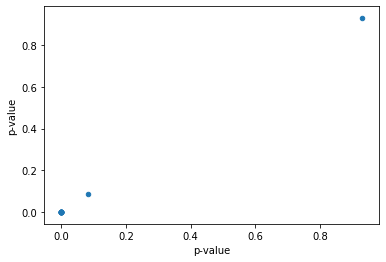

In [145]:
p_scores.plot.scatter(1,1)

In [0]:
#Didnt know how to apply visualization the most efficient way in this case....